In [12]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



618

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | awassa
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | paradwip
City not found. Skipping...
Processing Record 10 of Set 1 | sibu
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | tiznit
Processing Record 13 of Set 1 | politika
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | ahipara
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | hollister
Processing Record 18 of Set 1 | mount gambier
Processing Record 19 of Set 1 | magdalena
Processing Record 20 of Set 1 | ambilobe
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | ifanadiana
Processing

Processing Record 37 of Set 4 | namibe
Processing Record 38 of Set 4 | whitehorse
Processing Record 39 of Set 4 | gatesville
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | dano
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | dikson
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | nouadhibou
Processing Record 46 of Set 4 | pangnirtung
Processing Record 47 of Set 4 | lander
Processing Record 48 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 49 of Set 4 | tuatapere
Processing Record 50 of Set 4 | taoudenni
Processing Record 1 of Set 5 | cape town
Processing Record 2 of Set 5 | ternate
Processing Record 3 of Set 5 | sisimiut
Processing Record 4 of Set 5 | nikolskoye
Processing Record 5 of Set 5 | sangueya
Processing Record 6 of Set 5 | meyungs
City not found. Skipping...
Processing Record 7 of Set 5 | tezu
Processing Record 8 of Set 5 | valleyview
Processing Record 9 of Set 5 | visby
Processing Record 

Processing Record 28 of Set 8 | montepuez
Processing Record 29 of Set 8 | olga
Processing Record 30 of Set 8 | port hueneme
Processing Record 31 of Set 8 | mezhova
Processing Record 32 of Set 8 | canby
Processing Record 33 of Set 8 | kardasova recice
Processing Record 34 of Set 8 | sandy bay
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | mogadishu
Processing Record 37 of Set 8 | torres
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | kamaishi
Processing Record 40 of Set 8 | hays
Processing Record 41 of Set 8 | mergui
City not found. Skipping...
Processing Record 42 of Set 8 | vao
Processing Record 43 of Set 8 | singaparna
Processing Record 44 of Set 8 | mukhen
Processing Record 45 of Set 8 | mount isa
Processing Record 46 of Set 8 | baruun-urt
Processing Record 47 of Set 8 | crestview
Processing Record 48 of Set 8 | aripuana
Processing Record 49 of Set 8 | evensk
Processing Record 50 of Set 8 | goderich
Processing Record 1 of Set 9 | cuma

Processing Record 14 of Set 12 | belyy yar
Processing Record 15 of Set 12 | guerrero negro
Processing Record 16 of Set 12 | acapulco
Processing Record 17 of Set 12 | kodinar
Processing Record 18 of Set 12 | akkermanovka
Processing Record 19 of Set 12 | longyearbyen
Processing Record 20 of Set 12 | qasigiannguit
Processing Record 21 of Set 12 | pelym
Processing Record 22 of Set 12 | bathsheba
Processing Record 23 of Set 12 | havelock
Processing Record 24 of Set 12 | serebryansk
Processing Record 25 of Set 12 | rabo de peixe
Processing Record 26 of Set 12 | polson
Processing Record 27 of Set 12 | chapais
Processing Record 28 of Set 12 | oksovskiy
Processing Record 29 of Set 12 | talcahuano
Processing Record 30 of Set 12 | cockburn town
Processing Record 31 of Set 12 | domoni
Processing Record 32 of Set 12 | fort nelson
Processing Record 33 of Set 12 | mouila
Processing Record 34 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 35 of Set 12 | shahrud
Processing Rec

In [18]:
len(city_data)

566

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,81.66,76,62,20.07,KI,2020-12-31 01:21:08
1,Ancud,-41.87,-73.82,55.00,76,75,5.82,CL,2020-12-31 01:21:08
2,Bredasdorp,-34.53,20.04,57.20,87,2,5.82,ZA,2020-12-31 01:21:09
3,Airai,-8.93,125.41,71.80,82,56,1.63,TL,2020-12-31 01:21:09
4,Awassa,7.05,38.47,60.53,81,97,4.18,ET,2020-12-31 01:21:09
5,Isangel,-19.55,169.27,80.60,83,90,6.93,VU,2020-12-31 01:21:09
6,Mahebourg,-20.41,57.70,77.00,88,40,14.99,MU,2020-12-31 01:16:27
7,Albany,42.60,-73.97,36.00,45,100,1.99,US,2020-12-31 01:18:31
8,Sibu,2.30,111.82,77.00,94,40,2.24,MY,2020-12-31 01:21:10
9,Bengkulu,-3.80,102.27,78.40,74,80,2.73,ID,2020-12-31 01:21:10


In [24]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df_final = city_data_df[new_column_order]

In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df_final.to_csv(output_data_file, index_label="City_ID")

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-12-31 01:21:08,3.07,172.79,81.66,76,62,20.07
1,Ancud,CL,2020-12-31 01:21:08,-41.87,-73.82,55.00,76,75,5.82
2,Bredasdorp,ZA,2020-12-31 01:21:09,-34.53,20.04,57.20,87,2,5.82
3,Airai,TL,2020-12-31 01:21:09,-8.93,125.41,71.80,82,56,1.63
4,Awassa,ET,2020-12-31 01:21:09,7.05,38.47,60.53,81,97,4.18
5,Isangel,VU,2020-12-31 01:21:09,-19.55,169.27,80.60,83,90,6.93
6,Mahebourg,MU,2020-12-31 01:16:27,-20.41,57.70,77.00,88,40,14.99
7,Albany,US,2020-12-31 01:18:31,42.60,-73.97,36.00,45,100,1.99
8,Sibu,MY,2020-12-31 01:21:10,2.30,111.82,77.00,94,40,2.24
9,Bengkulu,ID,2020-12-31 01:21:10,-3.80,102.27,78.40,74,80,2.73


In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df_final["Lat"]
max_temps = city_data_df_final["Max Temp"]
humidity = city_data_df_final["Humidity"]
cloudiness = city_data_df_final["Cloudiness"]
wind_speed = city_data_df_final["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

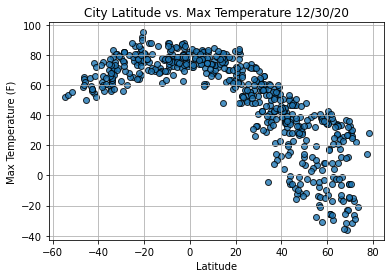

In [30]:
#Build Scatterplot
plt.scatter(lats, 
            max_temps, 
            edgecolor='black', linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

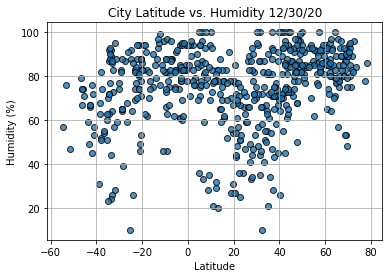

In [31]:
#Build Scatterplot
plt.scatter(lats, 
            humidity, 
            edgecolor='black', linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

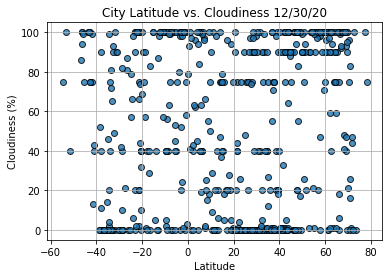

In [32]:
#Build Scatterplot
plt.scatter(lats, 
            cloudiness, 
            edgecolor='black', linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

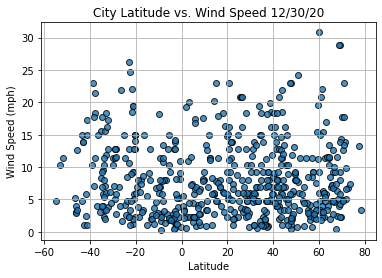

In [33]:
#Build Scatterplot
plt.scatter(lats, 
            wind_speed, 
            edgecolor='black', linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()